In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import patches

import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal

import warnings
warnings.filterwarnings('ignore')

In [5]:
def circle_scatter_add(data, x, y, val_c, val_f):
    data_new = data.copy()
    size = 25
    i_set = np.arange(0, size, 1)
    for _ in i_set:
        t = np.random.uniform(0, 1)*2*np.pi - np.pi
        len = np.abs(np.random.normal(loc=0, scale=1,size=1))
        x_c = x+np.cos(t)*len
        y_c = y+np.sin(t)*len
        x_f = x+3*np.cos(t)*len
        y_f = y+3*np.sin(t)*len
        df_1 = pd.DataFrame(data=[[x_c, y_c, val_c, 0]], columns=["X", "Y", "Close", "Far"])
        data_new = data_new.append(df_1, ignore_index=True)
        df_2 = pd.DataFrame(data=[[x_f, y_f, 0, val_f]], columns=["X", "Y", "Close", "Far"])
        data_new = data_new.append(df_2, ignore_index=True)
    return data_new


def data_circle(data, size):
    data_new = data.copy()
    for i in range(size):
        data_new = circle_scatter_add(data_new, data_new.iloc[i]["X"], data_new.iloc[i]["Y"], data_new.iloc[i]["Close"], data_new.iloc[i]["Far"])
    return data_new


def density_plot(data):
    xx, yy = np.meshgrid(data["X"].values, data["Y"].values)
    temp = np.c_[xx.ravel(), yy.ravel()]
    z = []
    for x in temp:
        check = (data["X"].isin([x[0]])) & (data["Y"].isin([x[1]]))
        if (data[check].empty):
            num = 0
        else:
            num = data[check]["Weighted Number"]
        z.append(num)
    z = np.array(z, dtype=int)
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap="Paired")
    plt.colorbar()
    plt.axis([0, 107, 0, 107])
    plt.show()


data = pd.read_csv("data.csv")
data_close = data[~data["Close"].isin([0])][['X', 'Y', 'Close', 'Far']]
# data_now = data_circle(data_close,len(data_close))
print(len(data_close))


2953


In [4]:
data_now = pd.read_csv("data_now.csv")

In [3]:
data_now

,Unnamed: 0,X,Y,Close,Far
0,0,34.735718,45.908841,1.0,6.0
1,1,36.965981,46.383497,1.0,17.0
2,2,37.310255,46.113536,5.0,24.0
3,3,38.477336,46.087024,4.0,25.0
4,4,46.253579,60.402221,1.0,4.0
...,...,...,...,...,...
98703,98703,40.836214,75.150249,1.0,0.0
98704,98704,40.099347,75.789388,1.0,0.0
98705,98705,40.668709,75.929152,1.0,0.0
98706,98706,40.945125,75.659846,0.0,8.0


In [6]:
data_close

,X,Y,Close,Far
26,34.735718,45.908841,1,6
27,36.965981,46.383497,1,17
28,37.310255,46.113536,5,24
29,38.477336,46.087024,4,25
114,46.253579,60.402221,1,4
...,...,...,...,...
24088,40.269509,73.547902,2,18
24089,40.615083,74.485727,4,16
24090,41.485127,74.335721,1,8
24091,41.275887,76.995216,1,2


[[0.16822429906542055, 0.16822429906542055],
 [0.35514018691588783, 0.5607476635514018],
 [0.37383177570093457, 0.3925233644859813],
 [0.38317757009345793, 0.6915887850467289],
 [0.4672897196261682, 0.3925233644859813],
 [0.5233644859813084, 0.37383177570093457],
 [0.514018691588785, 0.6074766355140186],
 [0.5046728971962616, 0.6915887850467289],
 [0.5981308411214953, 0.719626168224299],
 [0.7757009345794392, 0.2803738317757009],
 [0.794392523364486, 0.719626168224299],
 [0.6074766355140186, 0.2803738317757009],
 [0.4205607476635514, 0.7476635514018691]]

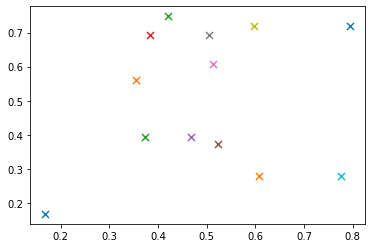

In [7]:
#data close
min_X = 0
max_X = 107
min_Y = 0
max_Y = 107
norm_X_close = (data_close['X'] - min_X) / (max_X - min_X)
norm_Y_close = (data_close['Y'] - min_Y) / (max_Y - min_Y)
mu = [[18,18],[38,60],[40,42],[41,74],[50,42],[56,40],[55,65],[54,74],[64,77],[83,30],[85,77],[65,30],[45,80]]
for i in range(len(mu)):
  mu[i][0] = (mu[i][0] - min_X) / (max_X - min_X)
  mu[i][1] = (mu[i][1] - min_Y) / (max_Y - min_Y)
  plt.scatter(mu[i][0],mu[i][1],s = 50,marker = 'x')
mu

In [26]:
class custom_GaussianMixture(object):
    '''Gaussian Mixture Model - vectorized implementation'''
    
    def __init__(self, n_components = 13, max_iter = 1000, tol = 0.001):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.means_ = None
        self.covariances_ = None
        self.log_likelihoods = None
        
    
    def fit(self,X,norm_X,norm_Y, output,y = None):

        n,d = X.shape  ## n = datapoints, d = features
        k = self.n_components  ##K number of clusters

        # randomly initialize the starting means #Now is the data-close!!!!!!!!!!!!!
        # mu =  [[0.16822429906542055, 0.16822429906542055],
        # [0.35514018691588783, 0.5607476635514018],
        # [0.37383177570093457, 0.3925233644859813],
        # [0.38317757009345793, 0.6915887850467289],
        # [0.4672897196261682, 0.3925233644859813],
        # [0.5233644859813084, 0.37383177570093457],
        # [0.514018691588785, 0.6074766355140186],
        # [0.5046728971962616, 0.6915887850467289],
        # [0.5981308411214953, 0.719626168224299],
        # [0.7757009345794392, 0.2803738317757009],
        # [0.794392523364486, 0.719626168224299],
        # [0.6074766355140186, 0.2803738317757009],
        # [0.4205607476635514, 0.7476635514018691]]
        mu = X[np.random.choice(n,k,replace = False)]

        # initialize a covariance matrix for each gaussian
        Sigma = [np.eye(d)*0.0001] * k

        # initialize the probability for each gaussian pi
        pi = np.array([1 / k] * k)

        # initialize responsibility matrix: n points for each gaussian
        W = np.zeros((n,k))

        # initialize list of log-likelihoods
        log_likelihoods = []

        # lambda function for gaussian pdf
        P = lambda m ,s: multivariate_normal.pdf(X, mean = m, cov = s)
        
       #===============================================================#
    
        while len(log_likelihoods) < self.max_iter:

            # E step

            # nominator of responsibilities: j is the j-th gaussian
            for j in range(k):
                W[:, j] = pi[j] * P(mu[j], Sigma[j])

            # log likelihood computation (same as nominator of responsibilities)    
            l = np.sum(np.log(np.sum(W, axis = 1)))

            # store log likelihood in list
            log_likelihoods.append(l)

            # compute W matrix by dividing by denominator (the sum along j) 
            W = (W.T / W.sum(axis = 1)).T

            # sum of w^i entries along j (used for parameter updates)
            # these are the soft weighted number of datapoints belonging to each gaussian
            W_s = np.sum(W, axis = 0)


            # M step

            for j in range(k):

                ## Update means
                mu[j] = (1. / W_s[j]) * np.sum(W[:, j] * X.T, axis = 1).T 

                ## Update covariances
                # Sigma[j] = ((W[:,j] * ((X - mu[j]).T)) @ (X - mu[j])) / W_s[j]

                ## Update probabilities of each gaussian
                pi[j] = W_s[j] / n

            # check for convergence
            if len(log_likelihoods) < 2: continue
            if np.abs(l - log_likelihoods[-2]) < self.tol: 
              print('Converge!')
              break

        self.means_ = mu
        self.covariances_ = Sigma
        self.log_likelihoods = log_likelihoods

        result = []
        for i in range(len(W)):
          max = 0
          pos = -1
          for j in range(k):
            if W[i][j] > max:
              max = W[i][j]
              pos = j
          result.append(pos)
          
        color = ['darkviolet', 'tomato', 'rosybrown', 'silver', 'royalblue', 'navy',
                         'orange', 'olive', 'fuchsia', 
                         'greenyellow', 'gold', 'darkred',
                         'darkgreen', 'cyan', 'brown', 'burlywood']
        color_map = []
        for i in range(len(result)):
          color_map.append(color[result[i]])
          
        print(len(norm_X))
        # for i in range(len(self.means_)):
        #   print(f"mu {i}: {self.means_[i]}")
        # plt.scatter(x = norm_X,y = norm_Y,c= color_map)
        # plt.show()
        
        return norm_X,norm_Y,color_map


In [9]:
norm_X_Y_close = np.vstack((norm_X_close,norm_Y_close)).T

Converge!
2953


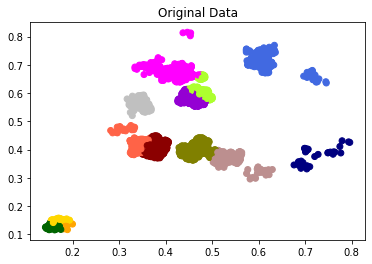

In [17]:
result = []
ac_gmm = custom_GaussianMixture()
ac_gmm_all = custom_GaussianMixture()
norm_x_original,norm_y_original,color_map = ac_gmm_all.fit(norm_X_Y_close,norm_X_close,norm_Y_close,result)
plt.scatter(x = norm_x_original,y = norm_y_original,c= color_map)
plt.title("Original Data")
plt.savefig("Original Data.png")


Converge!
98708


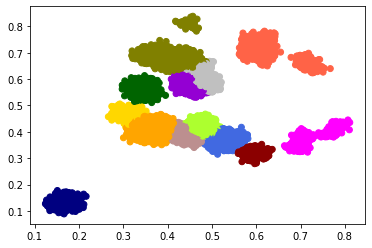

In [27]:
norm_X_close_all = (data_now['X'] - min_X) / (max_X - min_X)
norm_Y_close_all = (data_now['Y'] - min_Y) / (max_Y - min_Y)
norm_X_Y_close_all = np.vstack((norm_X_close_all,norm_Y_close_all)).T
result_all = []
ac_gmm_all = custom_GaussianMixture()
# norm_x_curr,norm_y_curr,color_map = ac_gmm_all.fit(norm_X_Y_close_all,norm_X_close_all,norm_Y_close_all,result_all)
norm_x_curr,norm_y_curr,color_map = ac_gmm_all.fit(norm_X_Y_close_all,norm_X_close_all,norm_Y_close_all,result_all)
plt.scatter(x = norm_x_curr,y = norm_y_curr,c=color_map)
plt.show()
# plt.savefig("Trial1.png")

In [58]:

def train_split_9(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    split_point = []
    for i in range(9):
        split_point.append(int(len(data)*(1/9)*i))
    split_idx = []   
    
    for i in range(len(split_point)-1):
        curr_idx = shuffled_indices[split_point[i]:split_point[i+1]]
        split_idx.append(curr_idx)
        
    split_idx.append(shuffled_indices[split_point[8]:])
    
    return split_idx

In [59]:
def Split(data,split_idx,i):
    data_t = data.copy()
    idx = data_t.iloc[list(split_idx[i])].index
    data_t = data_t.drop(index=idx)
    return data_t

def EM_val(data,split_idx,i):
    data_val = data.copy()
    data_val = Split(data_val,split_idx,i)
    result = []
    norm_X_close = (data_val['X']) / 107
    norm_Y_close = (data_val['Y']) / 107
    norm_X_Y_close = np.vstack((norm_X_close,norm_Y_close)).T
    ac_gmm = custom_GaussianMixture()
    norm_x,norm_y,color_map = ac_gmm.fit(norm_X_Y_close,norm_X_close,norm_Y_close,result)
    return norm_x,norm_y,color_map

In [61]:
def EM_Validate_all(data):
    print(len(data))
    split_idx = train_split_9(data)
    fig = plt.figure(figsize=(20,20),dpi=500)
    for i in range(1,10):
        print(f"Validation{i} Start")
        print(f"Validation{i} End")
        print("--------------------------------------------")
        norm_x_curr,norm_y_curr,color_map = EM_val(data,split_idx,i-1)
        plt.subplot(3,3,i)
        plt.scatter(x = norm_x_curr,y = norm_y_curr,c= color_map)
        plt.title(f"Validation{i}",fontsize=16)
    fig.savefig('Validation')
    plt.show()
        

In [66]:
def EM_Validate_all_normal(data):
    print(len(data))
    split_idx = train_split_9(data)
    fig = plt.figure(figsize=(20,20),dpi=500)
    for i in range(1,10):
        print(f"Validation{i} Start")
        print(f"Validation{i} End")
        print("--------------------------------------------")
        norm_x_curr,norm_y_curr,color_map = EM_val(data,split_idx,i-1)
        plt.subplot(3,3,i)
        plt.scatter(x = norm_x_curr,y = norm_y_curr,c= color_map)
        plt.title(f"Validation{i}",fontsize=16)
    fig.savefig('Validation_normal')
    plt.show()

In [ ]:
EM_Validate_all(data_now)

In [ ]:
data_normal = pd.read_csv("data_normal.csv")
EM_Validate_all_normal(data_normal)

[[0.16822429906542055, 0.16822429906542055],
 [0.35514018691588783, 0.5607476635514018],
 [0.37383177570093457, 0.3925233644859813],
 [0.38317757009345793, 0.6915887850467289],
 [0.4672897196261682, 0.3925233644859813],
 [0.514018691588785, 0.6074766355140186],
 [0.5981308411214953, 0.719626168224299],
 [0.7757009345794392, 0.2803738317757009],
 [0.794392523364486, 0.719626168224299],
 [0.6074766355140186, 0.2803738317757009],
 [0.4205607476635514, 0.7476635514018691]]

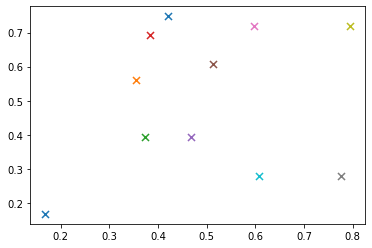

In [159]:
# More thoughts
min_X = 0
max_X = 107
min_Y = 0
max_Y = 107
norm_X_close = (data_close['X'] - min_X) / (max_X - min_X)
norm_Y_close = (data_close['Y'] - min_Y) / (max_Y - min_Y)
mu = [[18,18],[38,60],[40,42],[41,74],[50,42],[55,65],[64,77],[83,30],[85,77],[65,30],[45,80]]
for i in range(len(mu)):
  mu[i][0] = (mu[i][0] - min_X) / (max_X - min_X)
  mu[i][1] = (mu[i][1] - min_Y) / (max_Y - min_Y)
  plt.scatter(mu[i][0],mu[i][1],s = 50,marker = 'x')
mu

In [10]:
class custom_GaussianMixture_Weighted(object):
    '''Gaussian Mixture Model - vectorized implementation'''
    
    def __init__(self, n_components = 11, max_iter = 1000, tol = 0.001):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.means_ = None
        self.covariances_ = None
        self.log_likelihoods = None
        
    
    def fit(self,X,norm_X,norm_Y,cluster_influence,threshold,output,y = None):

        n,d = X.shape  ## n = datapoints, d = features
        k = self.n_components  ##K number of clusters

        # randomly initialize the starting means #Now is the data-close!!!!!!!!!!!!!
        mu =  [[0.16822429906542055, 0.16822429906542055],
        [0.35514018691588783, 0.5607476635514018],
        [0.37383177570093457, 0.3925233644859813],
        [0.38317757009345793, 0.6915887850467289],
        [0.4672897196261682, 0.3925233644859813],
        [0.514018691588785, 0.6074766355140186],
        [0.5981308411214953, 0.719626168224299],
        [0.7757009345794392, 0.2803738317757009],
        [0.794392523364486, 0.719626168224299],
        [0.6074766355140186, 0.2803738317757009],
        [0.4205607476635514, 0.7476635514018691]]

        # initialize a covariance matrix for each gaussian
        Sigma = [np.eye(d)*0.0001] * k

        # initialize the probability for each gaussian pi
        pi = np.array([1 / k] * k)

        # initialize responsibility matrix: n points for each gaussian
        W = np.zeros((n,k))

        # initialize list of log-likelihoods
        log_likelihoods = []

        # lambda function for gaussian pdf
        P = lambda m ,s: multivariate_normal.pdf(X, mean = m, cov = s)
        
       #===============================================================#
    
        while len(log_likelihoods) < self.max_iter:

            # E step

            # nominator of responsibilities: j is the j-th gaussian
            for j in range(k):
                W[:, j] = pi[j] * P(mu[j], Sigma[j])

            # log likelihood computation (same as nominator of responsibilities)    
            l = np.sum(np.log(np.sum(W, axis = 1)))

            # store log likelihood in list
            log_likelihoods.append(l)

            # compute W matrix by dividing by denominator (the sum along j) 
            W = (W.T / W.sum(axis = 1)).T

            # sum of w^i entries along j (used for parameter updates)
            # these are the soft weighted number of datapoints belonging to each gaussian
            W_s = np.sum(W, axis = 0)


            # M step
            
            for j in range(k):

                ## Update means
                mu[j] = (1. / W_s[j]) * np.sum(W[:, j] * X.T, axis = 1).T 

                ## Update covariances
                if(cluster_influence[j]>=threshold):
                  Sigma[j] = ((W[:,j] * ((X - mu[j]).T)) @ (X - mu[j])) / W_s[j]
                  if ((Sigma[j][0][0]>0.00025) or (Sigma[j][1][1]>0.00025)):
                    Sigma[j] = np.eye(d)*0.00025

                ## Update probabilities of each gaussian
                pi[j] = W_s[j] / n

            # check for convergence
            if len(log_likelihoods) < 2: continue
            if np.abs(l - log_likelihoods[-2]) < self.tol: 
              print('Converge!')
              break

        self.means_ = mu
        self.covariances_ = Sigma
        self.log_likelihoods = log_likelihoods

        result = []
        for i in range(len(W)):
          max = 0
          pos = -1
          for j in range(k):
            if W[i][j] > max:
              max = W[i][j]
              pos = j
          result.append(pos)
          
        color = ['darkviolet', 'tomato', 'rosybrown', 'silver', 'royalblue', 'navy',
                         'orange', 'olive', 'fuchsia', 
                         'greenyellow', 'gold', 'darkred',
                         'darkgreen', 'cyan', 'brown', 'burlywood']
        color_map = []
        for i in range(len(result)):
          color_map.append(color[result[i]])
          
        print(len(norm_X))
        # for i in range(len(self.means_)):
        #   print(f"mu {i}: {self.means_[i]}")
        # plt.scatter(x = norm_X,y = norm_Y,c= color_map)
        # plt.show()
        
        return norm_X,norm_Y,color_map


In [11]:
def influence(data,ls):
    ls_res = []
    for x in ls:
        x_low = x[0]-3
        x_up = x[0]+3
        y_low = x[1]-3
        y_up = x[1]+3
        data_temp = data[(data['X']<=x_up) & (data['X']>=x_low) & (data['Y']<=y_up) & (data['Y']>=y_low)]
        if(data_temp.empty):
            val = 0
        else:
            val = np.median(data_temp['Weighted Number'].values)
        ls_res.append(val)
    
    q2 = np.percentile(ls_res,50)
    
    return ls_res,q2        
            

In [12]:
data_now["Weighted Number"] = data_now["Close"]+0.2*data_now["Far"]
data_now.describe()

,Unnamed: 0,X,Y,Close,Far,Weighted Number
count,98708.000000,98708.000000,98708.000000,98708.000000,98708.000000,98708.000000
mean,49353.500000,46.637484,52.943973,3.422468,3.362473,4.094963
std,28494.689523,9.913948,14.363197,2.886476,7.982969,2.623627
min,0.000000,13.308179,9.455132,0.000000,0.000000,0.200000
25%,24676.750000,39.386114,42.687121,1.000000,0.000000,2.000000
50%,49353.500000,47.919557,46.070963,3.000000,0.000000,3.800000
75%,74030.250000,50.954975,63.479130,5.000000,0.000000,5.600000
max,98707.000000,86.792847,89.753536,13.000000,46.000000,20.600000


In [13]:
Initial_source = [[18,18],[38,60],[40,42],[41,74],[50,42],[55,65],[64,77],[83,30],[85,77],[65,30],[45,80]]

In [14]:
inf_init,inf_q2 = influence(data_now,Initial_source)

In [164]:
inf_init

[1.6, 4.0, 7.0, 4.0, 3.8000000000000003, 2.0, 4.0, 0, 0, 6.0, 0.4]

Converge!
98708


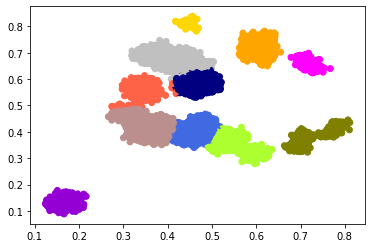

In [16]:
norm_X_Weighted = (data_now['X'] - min_X) / (max_X - min_X)
norm_Y_Weighted = (data_now['Y'] - min_Y) / (max_Y - min_Y)
norm_X_Y_close_all = np.vstack((norm_X_Weighted,norm_Y_Weighted)).T
result_w= []
ac_gmm_w = custom_GaussianMixture_Weighted()
norm_x_w,norm_y_w,color_map = ac_gmm_w.fit(norm_X_Y_close_all,norm_X_close_all,norm_Y_close_all,inf_init,inf_q2,result_w)
plt.scatter(x = norm_x_w,y = norm_y_w,c= color_map)
plt.savefig("Trial2.png")

In [166]:
def EM_val_new(data,split_idx,i,Init_source):
    data_val = data.copy()
    data_val = Split(data_val,split_idx,i)
    result = []
    norm_X_close = (data_val['X']) / 107
    norm_Y_close = (data_val['Y']) / 107
    norm_X_Y_close = np.vstack((norm_X_close,norm_Y_close)).T
    inf_init,inf_q2 = influence(data_val,Init_source)
    ac_gmm = custom_GaussianMixture_Weighted()
    norm_x,norm_y,color_map = ac_gmm.fit(norm_X_Y_close,norm_X_close,norm_Y_close,inf_init,inf_q2,result)
    return norm_x,norm_y,color_map

def EM_Validate_all_new(data,Init_source):
    print(len(data))
    split_idx = train_split_9(data)
    fig = plt.figure(figsize=(20,20),dpi=500)
    for i in range(1,10):
        print(f"Validation{i} Start")
        print(f"Validation{i} End")
        print("--------------------------------------------")
        norm_x_curr,norm_y_curr,color_map = EM_val_new(data,split_idx,i-1,Init_source)
        plt.subplot(3,3,i)
        plt.scatter(x = norm_x_curr,y = norm_y_curr,c= color_map)
        plt.title(f"Validation{i}",fontsize=16)
    fig.savefig('Validation_new')
    plt.show()

In [167]:
Initial_source_validation = [[18,18],[38,60],[40,42],[41,74],[50,42],[55,65],[64,77],[83,30],[85,77],[65,30],[45,80]]

In [168]:
EM_Validate_all_new(data_now,Initial_source_validation)

98708
Validation1 Start
Validation1 End
--------------------------------------------
Converge!
87741
Validation2 Start
Validation2 End
--------------------------------------------
Converge!
87740
Validation3 Start
Validation3 End
--------------------------------------------
Converge!
87741
Validation4 Start
Validation4 End
--------------------------------------------
Converge!
87740
Validation5 Start
Validation5 End
--------------------------------------------
Converge!
87741
Validation6 Start
Validation6 End
--------------------------------------------
Converge!
87740
Validation7 Start
Validation7 End
--------------------------------------------
Converge!
87741
Validation8 Start
Validation8 End
--------------------------------------------
Converge!
87740
Validation9 Start
Validation9 End
--------------------------------------------
Converge!
87740
